# Skopje Air Pollution

## Introduction

The city of Skopje is well known for its struggles with poor air quality, especially in the winter months. The main pollutants are CO, NO2, ozone, and particulate matter of different dimensions.

Monitoring stations for measuring the concentrations of each of the main pollutants have been installed in different locations around the city.

## Import Libraries
Before we begin, let us import the libraries that we will be using (Pandas, matplotlib and seaborn). Any additional libraries that we decide to import we will add in this cell.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The Dataset
The following data has been taken from kaggle (https://www.kaggle.com/datasets/cokastefan/pm10-pollution-data-in-skopje-from-2008-to-2018) where data from the monitoring stations (https://air.moepp.gov.mk/?page_id=175) for the period from Janaury 2007 to December 2018 has been compiled in a single dataset. To make our task more managable, we will only be looking at data for the time period of five years, from January 2012 to December 2016.

## Import data
The data is contained in the directory CSVs in the files (CO.csv, NO2.csv, O3.csv, PM10.csv, and PM25.csv). Let's import the data from the CSV files as separate pandas dataframes.

In [ ]:
df_CO=pd.read_csv('CO.csv')
df_NO2=pd.read_csv('NO2.csv')
df_O3=pd.read_csv('O3.csv')
df_PM10=pd.read_csv('PM10.csv')
df_PM25=pd.read_csv('PM25.csv')

## Review Data
Let's display each of the dataframes and look at the data types in order to get a sense of the data. Check that the data types are accurate.

In [ ]:
df_CO.info()
print('*'*50)
print(f'Number of duplicate values is : {df_CO.duplicated().sum()}')

In [ ]:
df_NO2.info()
print('*'*50)
print(f'Number of duplicate values is : {df_NO2.duplicated().sum()}')

In [ ]:
df_O3.info()
print('*'*50)
print(f'Number of duplicate values is : {df_O3.duplicated().sum()}')

In [ ]:
df_PM10.info()
print('*'*50)
print(f'Number of duplicate values is : {df_PM10.duplicated().sum()}')

In [ ]:
df_PM25.info()
print('*'*50)
print(f'Number of duplicate values is : {df_PM25.duplicated().sum()}')

In [ ]:
# Checking duplicates in the time column witch needs to contain only unique timestamps
print(df_CO.duplicated('time').sum())
print(df_NO2.duplicated('time').sum())
print(df_O3.duplicated('time').sum())
print(df_PM10.duplicated('time').sum())
print(df_PM25.duplicated('time').sum())

In [ ]:
df_CO.drop_duplicates('time', inplace=True)
df_NO2.drop_duplicates('time', inplace=True)
df_O3.drop_duplicates('time', inplace=True)
df_PM10.drop_duplicates('time', inplace=True)
df_PM25.drop_duplicates('time', inplace=True)

## Data cleaning and restructuring
Because the mobile column is from a mobile monitoring station located in the municipality of Butel and occasionally displaced, we can drop that column.

We can also rename the column time to datetime and create additional separate time and date columns. 

We can add a column in each of the dataframes indicating the type of pollutant and concatenate the dataframes.

### After initially reviewing the data, we can make conclusion  that : 
    1.Column 'Unnamed: 0.1' and 'Unnamed: 0' are the same columns and we can drop one of them and the other one will be renamed 'ID'
    2.Column named 'Mobile' contains only empty values in every table and we can drop it.

# I'll create new column named 'Pollutant' with value for each of the pollutant

### CO dataframe

In [ ]:
df_CO['Pollutant']='CO'

### NO2 dataframe

In [ ]:
df_NO2['Pollutant']='NO2'

### O3 dataframe

In [ ]:
df_O3['Pollutant']='O3'

### PM10 dataframe

In [ ]:
df_PM10['Pollutant']='PM10'

### PM25 dataframe

In [ ]:
df_PM25['Pollutant']='PM25'

In [ ]:
df=pd.concat([df_CO,df_NO2,df_O3,df_PM10,df_PM25])
df

In [ ]:
df=df.drop(columns=['Unnamed: 0.1','Mobile'])
df=df.rename(columns = {'Unnamed: 0':'ID','time':'Datetime'})
df['Datetime']=pd.to_datetime(df['Datetime'])
df['Year']=df['Datetime'].dt.year
df['Date']=df['Datetime'].dt.date
df['Time']=df['Datetime'].dt.hour
df['Month']=df['Datetime'].dt.month
df['Day']=df['Datetime'].dt.day
df['MonthName']=df['Datetime'].dt.month_name()
df

In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.2f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

# Question 1
What location in Skopje has the highest average pollution for each of the pollutants? .......... (2 points)

In [ ]:
avg_polution=df.groupby('Pollutant')[['Centar','GaziBaba','Karpos','Lisice','Miladinovci','Rektorat']].mean().round(decimals=2)
avg_polution

In [ ]:
f, ax =plt.subplots(2,3,figsize=(30, 10))
sns.despine(f)
sns.set(font_scale=1)

Centar=sns.barplot(x=avg_polution.index, y=avg_polution.values[:,0],ax=ax[0,0])
Centar.set(title = 'Average pollution in Centar')
show_values(Centar)


GaziBaba=sns.barplot(x=avg_polution.index, y=avg_polution.values[:,1],ax=ax[0,1])
GaziBaba.set(title = 'Average pollution in GaziBaba')
show_values(GaziBaba)


Karpos=sns.barplot(x=avg_polution.index, y=avg_polution.values[:,2],ax=ax[0,2])
Karpos.set(title = 'Average pollution in Karpos')
show_values(Karpos)


Lisice=sns.barplot(x=avg_polution.index, y=avg_polution.values[:,3],ax=ax[1,0])
Lisice.set(title = 'Average pollution in Lisice')
show_values(Lisice)


Miladinovci=sns.barplot(x=avg_polution.index, y=avg_polution.values[:,4],ax=ax[1,1])
Miladinovci.set(title = 'Average pollution in Miladinovci')
show_values(Miladinovci)


Rektorat=sns.barplot(x=avg_polution.index, y=avg_polution.values[:,5],ax=ax[1,2])
Rektorat.set(title = 'Average pollution in Rektorat')
show_values(Rektorat)

In [ ]:
result= {'Pollutant':avg_polution.idxmax(axis=1).index,
         'Location':avg_polution.idxmax(axis=1).values,
         'Highest_Average':avg_polution.max(axis=1).values}
result=pd.DataFrame(result)
result

In [ ]:
f, ax =plt.subplots(figsize=(10,5))
sns.despine(f)
sns.set(font_scale=1)

Centar=sns.barplot(x=result['Pollutant'], y=result['Highest_Average'],hue=result['Location'])
Centar.set(title = 'Highest average pollution by pollutant across locations in Skopje')
show_values(Centar)

# Question 2
For every year, for each of the pollutants, on what time stamp is the maximum pollution for every location? What time of the year seems to have the most pollution in Skopje? .......... (2 points)

In [ ]:
result=(df.set_index('Datetime')).groupby(['Year','Pollutant'])[['Centar','GaziBaba','Karpos','Lisice','Miladinovci','Rektorat']].agg(Centar_max=('Centar','max'),Centar_timestamp=('Centar','idxmax'),GaziBaba_max=('GaziBaba','max'),GaziBaba_timestamp=('GaziBaba','idxmax'),Karpos_max=('Karpos','max'),Karpos_timestamp=('Karpos','idxmax'),Lisice_max=('Lisice','max'),Lisice_timestamp=('Lisice','idxmax'),Miladinovci_max=('Miladinovci','max'),Miladinovci_timestamp=('Miladinovci','idxmax'),Rektorat_max=('Rektorat','max'),Rektorat_timestamp=('Rektorat','idxmax')).round(2)
result

In [ ]:
result = result.reset_index()

In [ ]:
f, ax = plt.subplots(2,3,figsize=(30, 10))
sns.despine(f)
sns.set_style('darkgrid')
sns.set_palette("rocket")
sns.barplot(x='Year',y="Centar_max",hue="Pollutant",data=result,ax=ax[0,0]).set(title = 'Air pollution in Centar')
sns.barplot(x="Year",y="GaziBaba_max",hue="Pollutant",data=result,ax=ax[0,1]).set(title = 'Air pollution in GaziBaba')
sns.barplot(x="Year",y="Karpos_max",hue="Pollutant",data=result,ax=ax[0,2]).set(title = 'Air pollution in Karpos')
sns.barplot(x="Year",y="Lisice_max",hue="Pollutant",data=result,ax=ax[1,0]).set(title = 'Air pollution in Lisice')
sns.barplot(x="Year",y="Miladinovci_max",hue="Pollutant",data=result,ax=ax[1,1]).set(title = 'Air pollution in Miladinovci')
sns.barplot(x="Year",y="Rektorat_max",hue="Pollutant",data=result,ax=ax[1,2]).set(title = 'Air pollution in Rektorat')

 ## What time of the year seems to have the most pollution in Skopje?
 ### *** For most of the pollutant (CO,NO2,PM10 and PM25) their highest value is from middle of December until middle of January , as for O3 the hihighest value is in the summer months with most peaks in July.

# Question 3
In what month of the year is the average polution accross locations highest for each of the pollutants? .......... (2 points)

In [ ]:
high_pollution=df.groupby(['MonthName','Pollutant'])[['Centar','GaziBaba','Karpos','Lisice','Miladinovci','Rektorat']].mean().reset_index('Pollutant').groupby('Pollutant').idxmax()
high_pollution

# Question 4
What is the average pollution accross locations in every hour during the day?  .......... (2 points)

### Because AQI is calculated using 24 hour daily average, we can't calculate the average pollution accross locations in every hour during the day, we can calculate the AQI index for every day

The formula to calculate AQxas per the instructions would look like this:


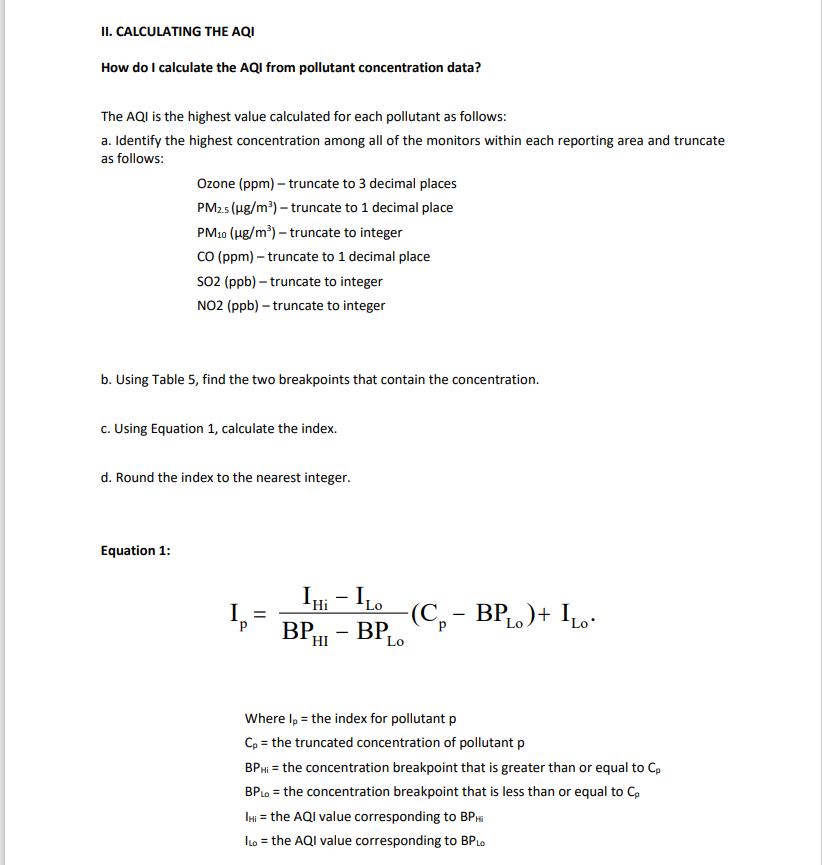
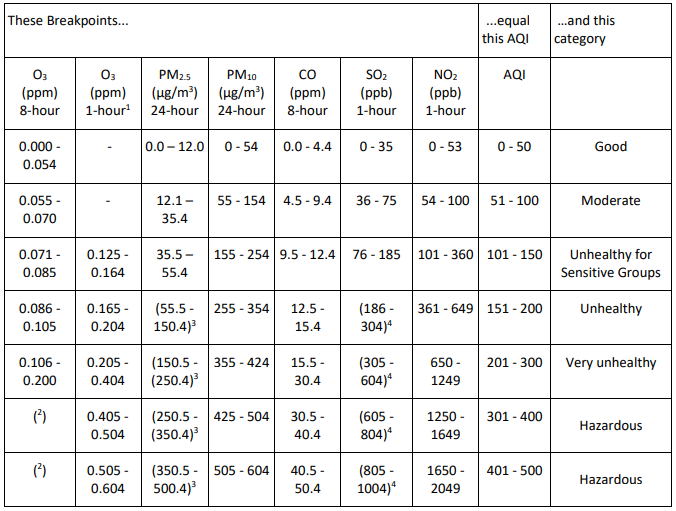

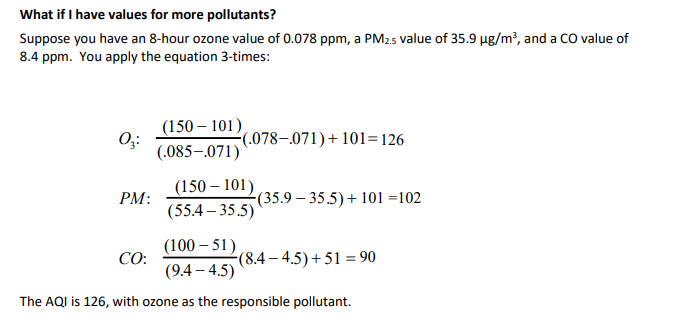

In [ ]:
df_aqi=df.fillna(0)
df_aqi

In [ ]:
# First we will need to calculate 24 hour average for every pollutant and location
df_aqi_co=df_aqi[df_aqi['Pollutant']=='CO'].groupby('Date')[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci','Rektorat']].mean()
df_aqi_no2=df_aqi[df_aqi['Pollutant']=='NO2'].groupby('Date')[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci','Rektorat']].mean()
df_aqi_o3=df_aqi[df_aqi['Pollutant']=='O3'].groupby('Date')[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci','Rektorat']].mean()
df_aqi_pm10=df_aqi[df_aqi['Pollutant']=='PM10'].groupby('Date')[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci','Rektorat']].mean()
df_aqi_pm25=df_aqi[df_aqi['Pollutant']=='PM25'].groupby('Date')[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci','Rektorat']].mean()

In [ ]:
def CO_AQI(x):
    x=round(x,1)
    if x <= 4.4 and x >= 0.0:
        return ((50-0)/(4.4-0.0))*(x-0.0)+0
    
    elif x <= 9.4 and x >= 4.5:
        return((100-51)/(9.4-4.5))*(x-4.5)+51
    
    elif x <= 12.4 and x >= 9.5:
        return ((150-101)/(12.4-9.5))*(x-9.5)+101
    
    elif x <= 15.4 and x >= 12.5:
        return ((200-151)/(15.4-12.5))*(x-12.5)+151

    elif x <= 30.4 and x >= 15.5:
        return ((300-201)/(30.4-15.5))*(x-15.5)+201

    elif x <= 40.4 and x >= 30.5:
        return ((400-301)/(40.4-30.5))*(x-30.5)+301

    elif x <= 50.4 and x >= 40.5:
        return ((500-401)/(50.4-40.5))*(x-40.5)+401
    else:
        return 500

In [ ]:
df_aqi_co['Centar AQI']=df_aqi_co['Centar'].apply(lambda x : CO_AQI(x)).round()
df_aqi_co['GaziBaba AQI']=df_aqi_co['GaziBaba'].apply(lambda x : CO_AQI(x)).round()
df_aqi_co['Karpos AQI']=df_aqi_co['Karpos'].apply(lambda x : CO_AQI(x)).round()
df_aqi_co['Lisice AQI']=df_aqi_co['Lisice'].apply(lambda x : CO_AQI(x)).round()
df_aqi_co['Miladinovci AQI']=df_aqi_co['Miladinovci'].apply(lambda x : CO_AQI(x)).round()
df_aqi_co['Rektorat AQI']=df_aqi_co['Rektorat'].apply(lambda x : CO_AQI(x)).round()
df_aqi_co=df_aqi_co.drop(columns=['Centar','GaziBaba','Karpos','Lisice','Miladinovci','Rektorat'])

In [ ]:
df_aqi_co['Pollutant']='CO'
df_aqi_co

In [ ]:
def NO2_AQI(x):
    x=int(round(x))
    if x <= 53 and x >= 0:
        return ((50-0)/(53-0))*(x-0)+0
    
    elif x <= 100 and x >= 54:
        return ((100-51)/(100-54))*(x-54)+51

    elif x <= 360 and x >= 101:
        return ((150-101)/(360-101))*(x-101)+101

    elif x <= 649 and x >= 361:
        return ((200-151)/(649-361))*(x-361)+151

    elif x <= 1249 and x >= 650:
        return ((300-201)/(1249-650))*(x-650)+201

    elif x <= 1649 and x >= 1250:
        return ((400-301)/(1649-1250))*(x-1250)+301

    elif x <= 2049 and x >= 1650:
        return ((500-401)/(2049-1650))*(x-1650)+401
    else:
        return 500

In [ ]:
df_aqi_no2['Centar AQI']=df_aqi_no2['Centar'].apply(lambda x : NO2_AQI(x)).round()
df_aqi_no2['GaziBaba AQI']=df_aqi_no2['GaziBaba'].apply(lambda x : NO2_AQI(x)).round()
df_aqi_no2['Karpos AQI']=df_aqi_no2['Karpos'].apply(lambda x : NO2_AQI(x)).round()
df_aqi_no2['Lisice AQI']=df_aqi_no2['Lisice'].apply(lambda x : NO2_AQI(x)).round()
df_aqi_no2['Miladinovci AQI']=df_aqi_no2['Miladinovci'].apply(lambda x : NO2_AQI(x)).round()
df_aqi_no2['Rektorat AQI']=df_aqi_no2['Rektorat'].apply(lambda x : NO2_AQI(x)).round()
df_aqi_no2=df_aqi_no2.drop(columns=['Centar','GaziBaba','Karpos','Lisice','Miladinovci','Rektorat'])

In [ ]:
df_aqi_no2['Pollutant']='NO2'
df_aqi_no2

In [ ]:
def O3_AQI(x):
    x=round(x/1000,3)
    if x <= 0.084 and x >= 0.00:
        return ((50-0)/(0.084-0.000))*(x-0.000)+0

    elif x<= 0.124 and x>= 0.085:
        return ((100-51)/(0.124-0.085))*(x-0.085)+51

    elif x<= 0.164 and x>= 0.125:
        return ((150-101)/(0.164-0.125))*(x-0.125)+101

    elif x<= 0.204 and x>= 0.165:
        return ((200-151)/(0.204-0.165))*(x-0.165)+151

    elif x<= 0.404 and x>= 0.205:
        return ((300-201)/(0.404-0.205))*(x-0.205)+201

    elif x<= 0.504 and x>= 0.405:
        return ((400-301)/(0.504-0.405))*(x-0.405)+301

    elif x<= 0.604 and x>= 0.505:
        return ((500-401)/(0.604-0.505))*(x-0.505)+401
    else:
        return 500

In [ ]:
df_aqi_o3['Centar AQI']=df_aqi_o3['Centar'].apply(lambda x : O3_AQI(x)).round()
df_aqi_o3['GaziBaba AQI']=df_aqi_o3['GaziBaba'].apply(lambda x : O3_AQI(x))
df_aqi_o3['Karpos AQI']=df_aqi_o3['Karpos'].apply(lambda x : O3_AQI(x)).round()
df_aqi_o3['Lisice AQI']=df_aqi_o3['Lisice'].apply(lambda x : O3_AQI(x)).round()
df_aqi_o3['Miladinovci AQI']=df_aqi_o3['Miladinovci'].apply(lambda x : O3_AQI(x)).round()
df_aqi_o3['Rektorat AQI']=df_aqi_o3['Rektorat'].apply(lambda x : O3_AQI(x)).round()
df_aqi_o3=df_aqi_o3.drop(columns=['Centar','GaziBaba','Karpos','Lisice','Miladinovci','Rektorat'])

In [ ]:
df_aqi_o3['Pollutant']='O3'
df_aqi_o3

In [ ]:
def PM10_AQI(x):
    x=int(x)
    if x<= 54 and x>= 0:
        return ((50-0)/(54-0))*(x-0)+0

    elif x<= 154 and x>= 55:
        return ((100-51)/(154-55))*(x-55)+51

    elif x<= 254 and x>= 155:
        return ((150-101)/(254-155))*(x-155)+101

    elif x<= 354 and x>= 255:
        return ((200-151)/(354-255))*(x-255)+151

    elif x<= 424 and x>= 355:
        return ((300-201)/(424-355))*(x-355)+201

    elif x<= 504 and x>= 425:
        return ((400-301)/(504-425))*(x-425)+301

    elif x<= 604 and x>= 505:
        return ((500-401)/(604-505))*(x-505)+401
    else:
        return 500

In [ ]:
df_aqi_pm10['Centar AQI']=df_aqi_pm10['Centar'].apply(lambda x : PM10_AQI(x)).round()
df_aqi_pm10['GaziBaba AQI']=df_aqi_pm10['GaziBaba'].apply(lambda x : PM10_AQI(x)).round()
df_aqi_pm10['Karpos AQI']=df_aqi_pm10['Karpos'].apply(lambda x : PM10_AQI(x)).round()
df_aqi_pm10['Lisice AQI']=df_aqi_pm10['Lisice'].apply(lambda x : PM10_AQI(x)).round()
df_aqi_pm10['Miladinovci AQI']=df_aqi_pm10['Miladinovci'].apply(lambda x : PM10_AQI(x)).round()
df_aqi_pm10['Rektorat AQI']=df_aqi_pm10['Rektorat'].apply(lambda x : PM10_AQI(x)).round()
df_aqi_pm10=df_aqi_pm10.drop(columns=['Centar','GaziBaba','Karpos','Lisice','Miladinovci','Rektorat'])

In [ ]:
df_aqi_pm10['Pollutant']='PM10'
df_aqi_pm10

In [ ]:
def PM25_AQI(x):
    x=round(x,1)
    if x <= 12.0 and x >= 0.0:
        return ((50-0)/(12.0-0))*(x-0)+0

    elif x <= 35.4 and x >= 12.1:
        return ((100-51)/(35.4-12.1))*(x-12.1)+51

    elif x <= 55.4 and x >= 35.5:
        return ((150-101)/(55.4-35.5))*(x-35.5)+101

    elif x <= 150.4 and x >= 55.5:
        return ((200-151)/(150.4-55.5))*(x-55.5)+151

    elif x <= 250.4 and x >= 150.5:
        return ((300-201)/(250.4-150.5))*(x-150.5)+201

    elif x <= 350.4 and x >= 250.5:
        return ((400-301)/(350.4-250.5))*(x-250.5)+301

    elif x <= 500.4 and x >= 350.5:
        return ((500-401)/(500.4-350.5))*(x-350.5)+401
    else:
        return 500

In [ ]:
df_aqi_pm25['Centar AQI']=df_aqi_pm25['Centar'].apply(lambda x : PM25_AQI(x)).round()
df_aqi_pm25['GaziBaba AQI']=df_aqi_pm25['GaziBaba'].apply(lambda x : PM25_AQI(x))
df_aqi_pm25['Karpos AQI']=df_aqi_pm25['Karpos'].apply(lambda x : PM25_AQI(x)).round()
df_aqi_pm25['Lisice AQI']=df_aqi_pm25['Lisice'].apply(lambda x : PM25_AQI(x))
df_aqi_pm25['Miladinovci AQI']=df_aqi_pm25['Miladinovci'].apply(lambda x : PM25_AQI(x))
df_aqi_pm25['Rektorat AQI']=df_aqi_pm25['Rektorat'].apply(lambda x : PM25_AQI(x))
df_aqi_pm25=df_aqi_pm25.drop(columns=['Centar','GaziBaba','Karpos','Lisice','Miladinovci','Rektorat'])

In [ ]:
df_aqi_pm25['Pollutant']='PM25'
df_aqi_pm25

In [ ]:
# Finally we can calculate the AQI index for every day, which is the max AQI index from all of the pollutants
df_aqi_final=pd.concat([df_aqi_co,df_aqi_no2,df_aqi_o3,df_aqi_pm10,df_aqi_pm25]).groupby('Date').max()
df_aqi_final.replace(0, np.nan, inplace=True)

In [ ]:
f, ax = plt.subplots(6,figsize=(30, 90))

ax[0].plot(df_aqi_final.index, df_aqi_final['Centar AQI'].values,color='red')
ax[1].plot(df_aqi_final.index, df_aqi_final['GaziBaba AQI'].values,color='blue')
ax[2].plot(df_aqi_final.index, df_aqi_final['Karpos AQI'].values,color='magenta')
ax[3].plot(df_aqi_final.index, df_aqi_final['Lisice AQI'].values,color='orange')
ax[4].plot(df_aqi_final.index, df_aqi_final['Miladinovci AQI'].values,color='green')
ax[5].plot(df_aqi_final.index, df_aqi_final['Rektorat AQI'].values,color='teal')

ax[0].set(title = 'Air Quality Index in Centar')
ax[1].set(title = 'Air Quality Index in GaziBaba')
ax[2].set(title = 'Air Quality Index in Karpos')
ax[3].set(title = 'Air Quality Index in Lisice')
ax[4].set(title = 'Air Quality Index in Miladinovci')
ax[5].set(title = 'Air Quality Index in Rektorat')

ax[0].axhline(y=50,color='green',linestyle='dotted', label='0-50, Good')
ax[1].axhline(y=50,color='green',linestyle='dotted', label='0-50, Good')
ax[2].axhline(y=50,color='green',linestyle='dotted', label='0-50, Good')
ax[3].axhline(y=50,color='green',linestyle='dotted', label='0-50, Good')
ax[4].axhline(y=50,color='green',linestyle='dotted', label='0-50, Good')
ax[5].axhline(y=50,color='green',linestyle='dotted', label='0-50, Good')

ax[0].axhline(y=100,color='yellow',linestyle='dotted', label='51-100, Moderate')
ax[1].axhline(y=100,color='yellow',linestyle='dotted', label='51-100, Moderate')
ax[2].axhline(y=100,color='yellow',linestyle='dotted', label='51-100, Moderate')
ax[3].axhline(y=100,color='yellow',linestyle='dotted', label='51-100, Moderate')
ax[4].axhline(y=100,color='yellow',linestyle='dotted', label='51-100, Moderate')
ax[5].axhline(y=100,color='yellow',linestyle='dotted', label='51-100, Moderate')

ax[0].axhline(y=150,color='orange',linestyle='dotted', label='101-150, Unhealthy for sensitive Groups')
ax[1].axhline(y=150,color='orange',linestyle='dotted', label='101-150, Unhealthy for sensitive Groups')
ax[2].axhline(y=150,color='orange',linestyle='dotted', label='101-150, Unhealthy for sensitive Groups')
ax[3].axhline(y=150,color='orange',linestyle='dotted', label='101-150, Unhealthy for sensitive Groups')
ax[4].axhline(y=150,color='orange',linestyle='dotted', label='101-150, Unhealthy for sensitive Groups')
ax[5].axhline(y=150,color='orange',linestyle='dotted', label='101-150, Unhealthy for sensitive Groups')


ax[0].axhline(y=200,color='red',linestyle='dotted', label='151-200, Unhealthy')
ax[1].axhline(y=200,color='red',linestyle='dotted', label='151-200, Unhealthy')
ax[2].axhline(y=200,color='red',linestyle='dotted', label='151-200, Unhealthy')
ax[3].axhline(y=200,color='red',linestyle='dotted', label='151-200, Unhealthy')
ax[4].axhline(y=200,color='red',linestyle='dotted', label='151-200, Unhealthy')
ax[5].axhline(y=200,color='red',linestyle='dotted', label='151-200, Unhealthy')


ax[0].axhline(y=300,color='#99004c',linestyle='dotted', label='201-300, Very Unhealthy')
ax[1].axhline(y=300,color='#99004c',linestyle='dotted', label='201-300, Very Unhealthy')
ax[2].axhline(y=300,color='#99004c',linestyle='dotted', label='201-300, Very Unhealthy')
ax[3].axhline(y=300,color='#99004c',linestyle='dotted', label='201-300, Very Unhealthy')
ax[4].axhline(y=300,color='#99004c',linestyle='dotted', label='201-300, Very Unhealthy')
ax[5].axhline(y=300,color='#99004c',linestyle='dotted', label='201-300, Very Unhealthy')


ax[0].axhline(y=400,color='#7e0023',linestyle='dotted', label='301-400, Hazardous')
ax[1].axhline(y=400,color='#7e0023',linestyle='dotted', label='301-400, Hazardous')
ax[2].axhline(y=400,color='#7e0023',linestyle='dotted', label='301-400, Hazardous')
ax[3].axhline(y=400,color='#7e0023',linestyle='dotted', label='301-400, Hazardous')
ax[4].axhline(y=400,color='#7e0023',linestyle='dotted', label='301-400, Hazardous')
ax[5].axhline(y=400,color='#7e0023',linestyle='dotted', label='301-400, Hazardous')

ax[0].axhline(y=500,color='#7e0023',linestyle='dotted', label='401-500, Hazardous')
ax[1].axhline(y=500,color='#7e0023',linestyle='dotted', label='401-500, Hazardous')
ax[2].axhline(y=500,color='#7e0023',linestyle='dotted', label='401-500, Hazardous')
ax[3].axhline(y=500,color='#7e0023',linestyle='dotted', label='401-500, Hazardous')
ax[4].axhline(y=500,color='#7e0023',linestyle='dotted', label='401-500, Hazardous')
ax[5].axhline(y=500,color='#7e0023',linestyle='dotted', label='401-500, Hazardous')

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')
ax[3].legend(loc='upper left')
ax[4].legend(loc='upper left')
ax[5].legend(loc='upper left')

# Question 5

Calculate and display the average daily pollution accross locations on separate plots for each of the pollutants over time. .......... (3 points)

### I will calculate the average daily pollution accross locations using AQI index

In [ ]:
df_aqi_co.replace(0, np.nan, inplace=True)

In [ ]:
f, ax = plt.subplots(2,3,figsize=(30, 10))

ax[0,0].plot(df_aqi_co.index, df_aqi_co['Centar AQI'].values,color='red')
ax[0,1].plot(df_aqi_co.index, df_aqi_co['GaziBaba AQI'].values,color='blue')
ax[0,2].plot(df_aqi_co.index, df_aqi_co['Karpos AQI'].values,color='magenta')
ax[1,0].plot(df_aqi_co.index, df_aqi_co['Lisice AQI'].values,color='orange')
ax[1,1].plot(df_aqi_co.index, df_aqi_co['Miladinovci AQI'].values,color='green')
ax[1,2].plot(df_aqi_co.index, df_aqi_co['Rektorat AQI'].values,color='teal')

ax[0,0].set(title = 'Average pollution in Centar with CO')
ax[0,1].set(title = 'Average pollution in GaziBaba with CO')
ax[0,2].set(title = 'Average pollution in Karpos with CO')
ax[1,0].set(title = 'Average pollution in Lisice with CO')
ax[1,1].set(title = 'Average pollution in Miladinovci with CO')
ax[1,2].set(title = 'Average pollution in Rektorat with CO')

In [ ]:
df_aqi_no2.replace(0, np.nan, inplace=True)

In [ ]:
f, ax = plt.subplots(2,3,figsize=(30, 10))

ax[0,0].plot(df_aqi_no2.index, df_aqi_no2['Centar AQI'].values,color='red')
ax[0,1].plot(df_aqi_no2.index, df_aqi_no2['GaziBaba AQI'].values,color='blue')
ax[0,2].plot(df_aqi_no2.index, df_aqi_no2['Karpos AQI'].values,color='magenta')
ax[1,0].plot(df_aqi_no2.index, df_aqi_no2['Lisice AQI'].values,color='orange')
ax[1,1].plot(df_aqi_no2.index, df_aqi_no2['Miladinovci AQI'].values,color='green')
ax[1,2].plot(df_aqi_no2.index, df_aqi_no2['Rektorat AQI'].values,color='teal')

ax[0,0].set(title = 'Average pollution in Centar with NO2')
ax[0,1].set(title = 'Average pollution in GaziBaba with NO2')
ax[0,2].set(title = 'Average pollution in Karpos with NO2')
ax[1,0].set(title = 'Average pollution in Lisice with NO2')
ax[1,1].set(title = 'Average pollution in Miladinovci with NO2')
ax[1,2].set(title = 'Average pollution in Rektorat with NO2')

In [ ]:
df_aqi_o3.replace(0, np.nan, inplace=True)

In [ ]:
f, ax = plt.subplots(5,figsize=(30, 60))

ax[0].plot(df_aqi_o3.index, df_aqi_o3['Centar AQI'].values,color='red')
ax[1].plot(df_aqi_o3.index, df_aqi_o3['Karpos AQI'].values,color='magenta')
ax[2].plot(df_aqi_o3.index, df_aqi_o3['Lisice AQI'].values,color='orange')
ax[3].plot(df_aqi_o3.index, df_aqi_o3['Miladinovci AQI'].values,color='green')
ax[4].plot(df_aqi_o3.index, df_aqi_o3['Rektorat AQI'].values,color='teal')

ax[0].set(title = 'Average pollution in Centar with O3')
ax[1].set(title = 'Average pollution in Karpos with O3')
ax[2].set(title = 'Average pollution in Lisice with O3')
ax[3].set(title = 'Average pollution in Miladinovcxwith O3')
ax[4].set(title = 'Average pollution in Rektorat with O3')

In [ ]:
df_aqi_pm10.replace(0, np.nan, inplace=True)

In [ ]:
f, ax = plt.subplots(2,3,figsize=(30, 10))

ax[0,0].plot(df_aqi_pm10.index, df_aqi_pm10['Centar AQI'].values,color='red')
ax[0,1].plot(df_aqi_pm10.index, df_aqi_pm10['GaziBaba AQI'].values,color='blue')
ax[0,2].plot(df_aqi_pm10.index, df_aqi_pm10['Karpos AQI'].values,color='magenta')
ax[1,0].plot(df_aqi_pm10.index, df_aqi_pm10['Lisice AQI'].values,color='orange')
ax[1,1].plot(df_aqi_pm10.index, df_aqi_pm10['Miladinovci AQI'].values,color='green')
ax[1,2].plot(df_aqi_pm10.index, df_aqi_pm10['Rektorat AQI'].values,color='teal')

ax[0,0].set(title = 'Average pollution in Centar with PM10')
ax[0,1].set(title = 'Average pollution in GaziBaba with PM10')
ax[0,2].set(title = 'Average pollution in Karpos with PM10')
ax[1,0].set(title = 'Average pollution in Lisice with PM10')
ax[1,1].set(title = 'Average pollution in Miladinovcxwith PM10')
ax[1,2].set(title = 'Average pollution in Rektorat with PM10')

In [ ]:
df_aqi_pm25.replace(0, np.nan, inplace=True)

In [ ]:
f, ax = plt.subplots(2,figsize=(30, 15))

ax[0].plot(df_aqi_pm25.index, df_aqi_pm25['Centar AQI'].values,color='red')
ax[1].plot(df_aqi_pm25.index, df_aqi_pm25['Karpos AQI'].values,color='magenta')


ax[0].set(title = 'Average pollution in Centar with PM25')
ax[1].set(title = 'Average pollution in Karpos with PM25')

## Questions 6
If the range of values for PM10 considered safe and unsafe is according to the following scale:

Good                                    0-50

Moderate 	                            51-154

Unhealthy for sensitive individuals 	155-254

Unhealthy 	                            255-354

Very unhealthy                          355-424

Hazardous                               425-504

On how many days in each year, was the average value of PM10 meauserd accross locations worse than moderate?  .......... (3 points)

In [ ]:
df_PM10_Centar=df[(df['Pollutant']=='PM10')&((df['Centar']>154))].groupby('Year').Date.nunique()
df_PM10_Centar=df[(df['Pollutant']=='PM10') & ((df['Centar']>154))].groupby('Year').Date.nunique()
df_PM10_GaziBaba=df[(df['Pollutant']=='PM10') & ((df['GaziBaba']>154))].groupby('Year').Date.nunique()
df_PM10_Karpos=df[(df['Pollutant']=='PM10') & ((df['Karpos']>154))].groupby('Year').Date.nunique()
df_PM10_Lisice=df[(df['Pollutant']=='PM10') & ((df['Lisice']>154))].groupby('Year').Date.nunique()
df_PM10_Miladinovci=df[(df['Pollutant']=='PM10') & ((df['Miladinovci']>154))].groupby('Year').Date.nunique()
df_PM10_Rektorat=df[(df['Pollutant']=='PM10') & ((df['Rektorat']>154))].groupby('Year').Date.nunique()

In [ ]:
result=pd.DataFrame()
result['Centar']=pd.Series(df_PM10_Centar.values,index=df_PM10_Centar.index)
result['GaziBaba']=pd.Series(df_PM10_GaziBaba.values,index=df_PM10_GaziBaba.index)
result['Karpos']=pd.Series(df_PM10_Karpos.values,index=df_PM10_Karpos.index)
result['Lisice']=pd.Series(df_PM10_Lisice.values,index=df_PM10_Lisice.index)
result['Miladinovci']=pd.Series(df_PM10_Miladinovci.values,index=df_PM10_Miladinovci.index)
result['Rektorat']=pd.Series(df_PM10_Rektorat.values,index=df_PM10_Rektorat.index)
result

In [ ]:
f, ax =plt.subplots(2,3,figsize=(30, 10))
sns.despine(f)
sns.set_style('darkgrid')
sns.set_palette("viridis")
Centar=sns.barplot(x=result.index, y=result.values[:,0],ax=ax[0,0])
Centar.set(title = 'Total days by year where average PM10 is worst than moderate in Centar ')
show_values(Centar)


GaziBaba=sns.barplot(x=result.index, y=result.values[:,1],ax=ax[0,1])
GaziBaba.set(title = 'Total days by year where average PM10 is worst than moderate in GaziBaba ')
show_values(GaziBaba)


Karpos=sns.barplot(x=result.index, y=result.values[:,2],ax=ax[0,2])
Karpos.set(title = 'Total days by year where average PM10 is worst than moderate in Karpos ')
show_values(Karpos)


Lisice=sns.barplot(x=result.index, y=result.values[:,3],ax=ax[1,0])
Lisice.set(title = 'Total days by year where average PM10 is worst than moderate in Lisice ')
show_values(Lisice)


Miladinovci=sns.barplot(x=result.index, y=result.values[:,4],ax=ax[1,1])
Miladinovci.set(title = 'Total days by year where average PM10 is worst than moderate in Miladinovcx')
show_values(Miladinovci)


Rektorat=sns.barplot(x=result.index, y=result.values[:,5],ax=ax[1,2])
Rektorat.set(title = 'Total days by year where average PM10 is worst than moderate in Rektorat ')
show_values(Rektorat)

## Question 7
On how many days in each year, was the value of PM10 measured on at least one location worse than moderate? .......... (3 points)

In [ ]:
df_PM10=df[(df['Pollutant']=='PM10') & ((df['Centar']>154) | (df['GaziBaba']>154) | (df['Karpos']>154) | (df['Lisice']>154) | (df['Miladinovci']>154) | (df['Rektorat']>154))]
result=df_PM10.groupby('Year').Date.nunique()
result

## Question 8
Make a bar plot showing the average number of days when the measured value for PM10 was worse than moderate on at least one location.  .......... (3 points)

In [ ]:
plt.figure(figsize=(10, 5))
sns.despine(f)
sns.set_style('darkgrid')
sns.set_palette("viridis")
result_barplot=sns.barplot(x=result.index, y=result.values)
result_barplot.set(title = 'Total days in year where the average PM10 is worst than moderate in Skopje')
show_values(result_barplot)